In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
file = r"C:\Users\Ali-Abbass\Documents/L6 Data Sci/Data Sci Professional Practise/heloc_dataset_v1.csv"

# Load the data
df = pd.read_csv(file)

In [3]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [4]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [5]:
# ==========================================
# PHASE 2: PREPROCESSING FUNCTION
# ==========================================
def preprocess_fico_phase2(df):
    target_map = {'Bad': 1, 'Good': 0}
    df['RiskPerformance'] = df['RiskPerformance'].map(target_map)

    special_codes = {'No_Record': -9, 'No_Usable_Trades': -8, 'Condition_Not_Met': -7}
    
    # Identify features (all except target)
    features = [col for col in df.columns if col != 'RiskPerformance']

    for name, code in special_codes.items():
        for col in features:
            if (df[col] == code).any():
                df[f'{col}_{name}_flag'] = (df[col] == code).astype(int)

    # Mask negative values with NaN (we will fill these later in Phase 3)
    df[features] = df[features].mask(df[features] < 0, np.nan)
    return df

In [6]:
# Checking the new structure
processed_df = preprocess_fico_phase2(df.copy())
processed_df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,MSinceMostRecentDelq_No_Usable_Trades_flag,MSinceMostRecentInqexcl7days_No_Usable_Trades_flag,NetFractionRevolvingBurden_No_Usable_Trades_flag,NetFractionInstallBurden_No_Usable_Trades_flag,NumRevolvingTradesWBalance_No_Usable_Trades_flag,NumInstallTradesWBalance_No_Usable_Trades_flag,NumBank2NatlTradesWHighUtilization_No_Usable_Trades_flag,PercentTradesWBalance_No_Usable_Trades_flag,MSinceMostRecentDelq_Condition_Not_Met_flag,MSinceMostRecentInqexcl7days_Condition_Not_Met_flag
0,1,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,NaN,...,0,0,0,1,0,1,1,0,1,0
2,1,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,...,0,0,0,0,0,0,0,0,0,0
4,1,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,NaN,...,0,0,0,0,0,0,0,0,1,0


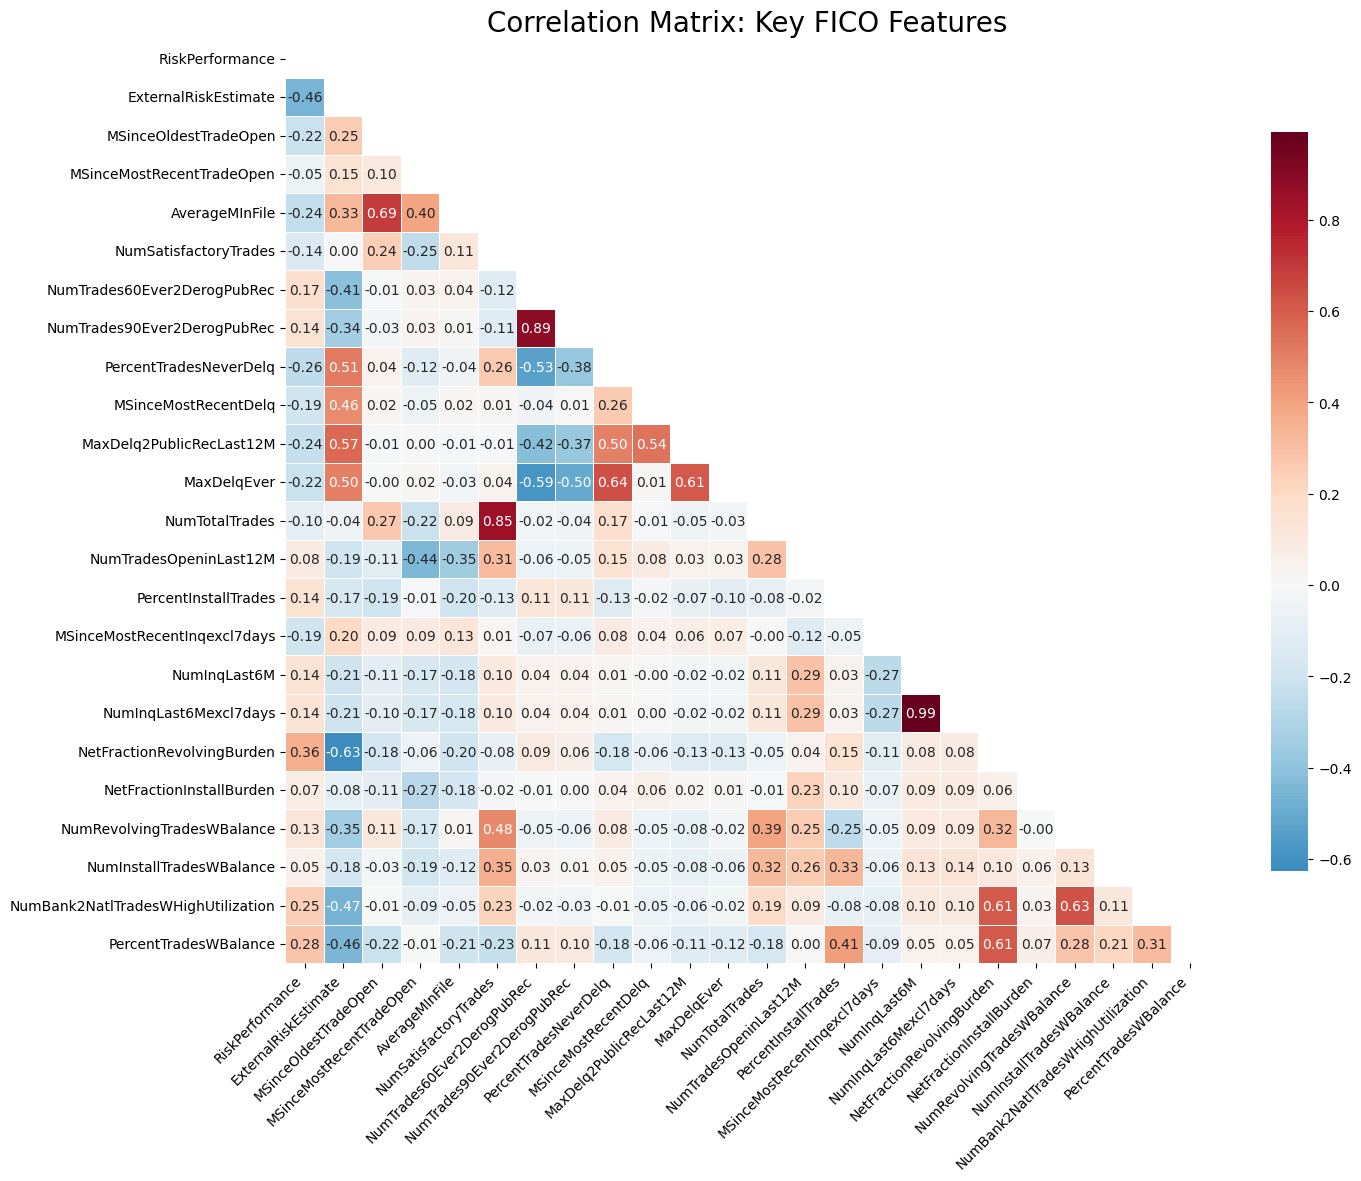

In [7]:
def plot_fico_heatmap(df):
    # 1. Select the original features + target (exclude the 34+ indicator flags for now)
    # This keeps the 'big picture' clean.
    original_cols = [col for col in df.columns if '_flag' not in col]
    corr = df[original_cols].corr()

    # 2. Create a Mask for the upper triangle
    # In a correlation matrix, the top-right is a mirror of the bottom-left. 
    # Masking the top makes it 2x easier to read.
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 3. Set up the matplotlib figure
    plt.figure(figsize=(16, 12))

    # 4. Draw the heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        cmap='RdBu_r',   # Red = Positive, Blue = Negative (Standard for Risk)
        center=0, 
        annot=True,      # Show the actual numbers
        fmt='.2f', 
        linewidths=0.5, 
        square=True,
        cbar_kws={"shrink": .8}
    )

    plt.title('Correlation Matrix: Key FICO Features', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Run it
plot_fico_heatmap(processed_df)

In [10]:
X = processed_df.drop(columns=['RiskPerformance'])
y = processed_df['RiskPerformance']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle NaNs created in Phase 2 (Imputation)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median()) # Use train median to avoid leakage

# Manual Drops (Multicollinearity)
to_remove = ['NumInqLast6M', 'NumTrades60Ever2DerogPubRec', 'NumTotalTrades']
X_train = X_train.drop(columns=to_remove)
X_test = X_test.drop(columns=to_remove)

# Automated Flag Drops (1.0 Correlation)
corr_matrix = X_train.filter(like='_flag').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_flags = [column for column in upper.columns if any(upper[column] == 1.0)]
X_train = X_train.drop(columns=to_drop_flags)
X_test = X_test.drop(columns=to_drop_flags)

print("PHASE 3 COMPLETE")
print("-" * 30)
print(f"Initial Features:       {X.shape[1]}")
print(f"Manual Numerical Drops: {len(to_remove)}")
print(f"Redundant Flag Drops:   {len(to_drop_flags)}")
print(f"Final Feature Count:    {X_train.shape[1]}")
print("-" * 30)

PHASE 3 COMPLETE
------------------------------
Initial Features:       57
Manual Numerical Drops: 3
Redundant Flag Drops:   21
Final Feature Count:    33
------------------------------


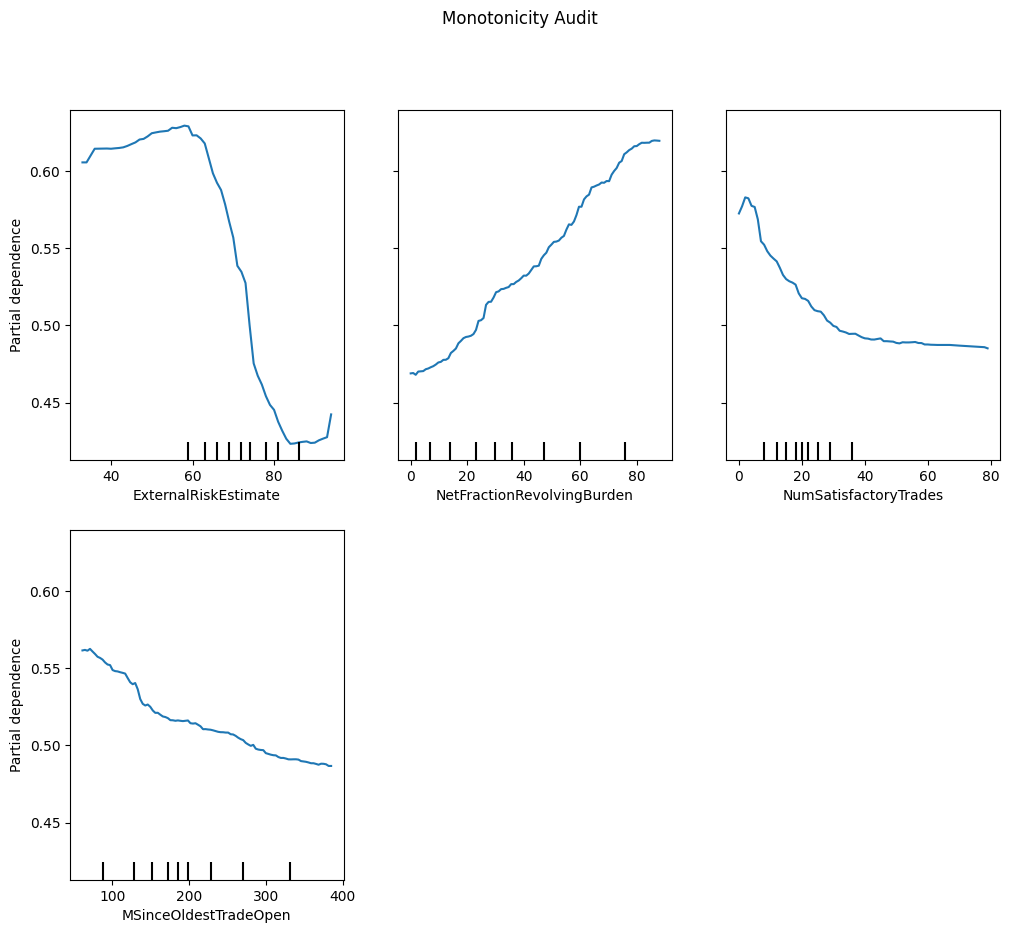

In [11]:
# ==========================================
# PHASE 4: LOGIC VALIDATION (MONOTONICITY)
# ==========================================
# Use the CLEANED X_train for the Monotonicity check
mono_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
mono_model.fit(X_train, y_train)

key_features = ['ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'NumSatisfactoryTrades', 'MSinceOldestTradeOpen']
fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(mono_model, X_train, features=key_features, ax=ax)
plt.suptitle("Monotonicity Audit")
plt.show()

In [12]:
# 1. Create a Pipeline
# A Pipeline is 'Professional Practice' because it prevents 'Data Leakage'
# by ensuring the scaling logic only learns from the training data.
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Fit the Pipeline
# This will likely converge in under 100 iterations
baseline_pipeline.fit(X_train, y_train)

# 3. Evaluate
y_prob_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]
print(f"Converged Baseline AUC: {roc_auc_score(y_test, y_prob_baseline):.4f}")

Converged Baseline AUC: 0.7909


In [18]:
# 1. Define the refined parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 10, 15, None],  # 'None' means trees grow until leaves are pure
    'min_samples_split': [2, 5]
}

# 2. Setup the search with Stratified CV for stability
# n_jobs=-1 uses all CPU cores for efficiency
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc',
    n_jobs=-1 
)

# 3. Fit the model
grid_search.fit(X_train, y_train)

# 4. Specific Outputs for your Model Card
best_n = grid_search.best_params_['n_estimators']
best_d = grid_search.best_params_['max_depth']
rf_best_score = grid_search.best_score_

print("-" * 30)
print(f"RESULTS OF HYPERPARAMETER TUNING:")
print(f"Best n_estimators: {best_n}")
print(f"Best max_depth:    {best_d if best_d is not None else 'Unlimited'}")
print(f"Best Grid AUC:     {rf_best_score:.4f}")
print("-" * 30)

------------------------------
RESULTS OF HYPERPARAMETER TUNING:
Best n_estimators: 400
Best max_depth:    10
Best Grid AUC:     0.7944
------------------------------


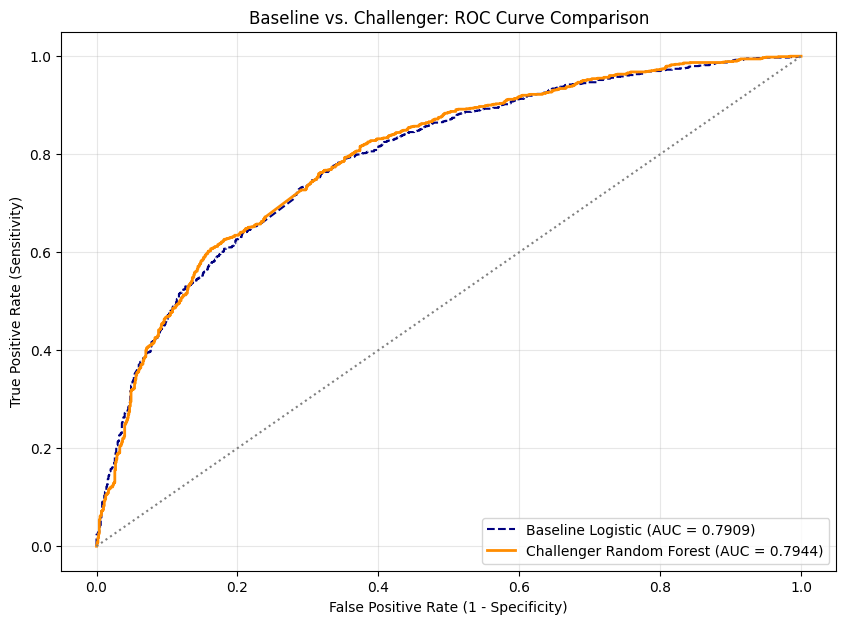

In [19]:
# 1. Get probabilities for the ROC curve
# (Assumes you have baseline_pipeline and grid_search from previous steps)
y_prob_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = grid_search.predict_proba(X_test)[:, 1]

# 2. Calculate ROC curves
fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_baseline)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# 3. Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_b, tpr_b, label=f'Baseline Logistic (AUC = 0.7909)', color='navy', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Challenger Random Forest (AUC = {rf_best_score:.4f})', color='darkorange', linewidth=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle=':') # Diagonal line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Baseline vs. Challenger: ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Ali-Abbass\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


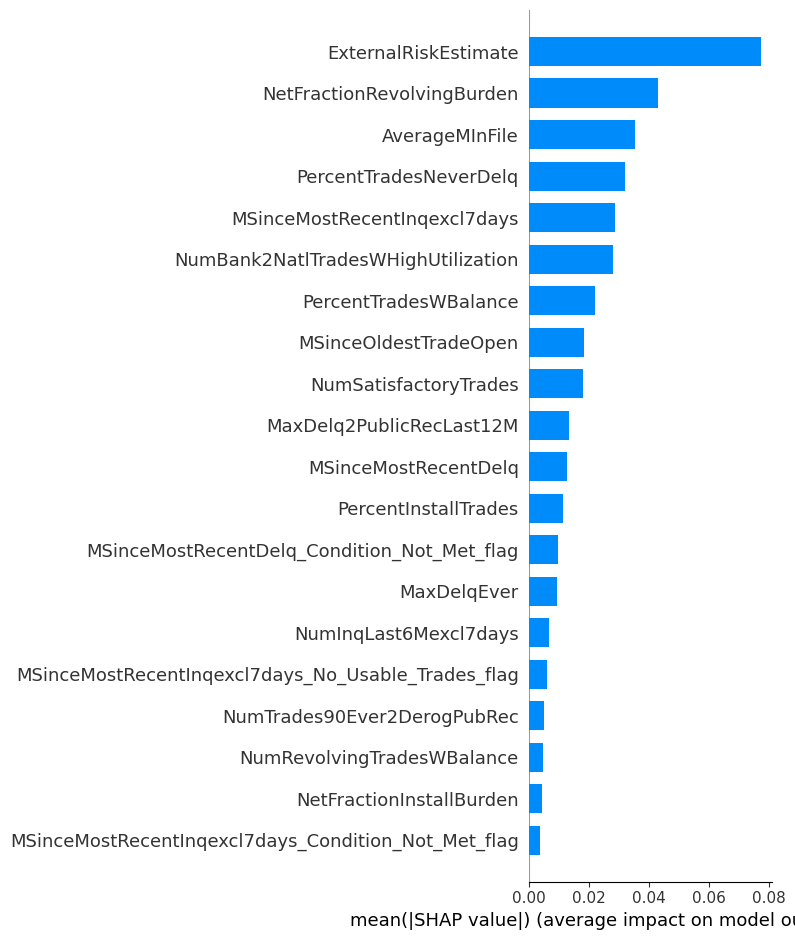

In [17]:
import shap
# 1. Initialize the Explainer
# For Random Forest, we use TreeExplainer (optimized for speed)
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# 2. Plot Summary (For Class 1: 'Bad' risk)
# Feature importance is shown by the horizontal spread
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

In [20]:
# 1. Extract the coefficients from the pipeline
model_step = baseline_pipeline.named_steps['log_reg']
feature_names = X_train.columns

# 2. Create a DataFrame of coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_step.coef_[0]
})

# 3. Calculate Odds Ratios (e^(coefficient))
# This tells you the multiplicative change in odds
importance_df['Odds_Ratio'] = np.exp(importance_df['Coefficient'])

# 4. Sort by absolute impact
importance_df['Abs_Impact'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Impact', ascending=False)

print("Top 10 Logistic Regression Drivers:")
print(importance_df[['Feature', 'Coefficient', 'Odds_Ratio']].head(10))

Top 10 Logistic Regression Drivers:
                                              Feature  Coefficient  Odds_Ratio
0                                ExternalRiskEstimate    -0.393157    0.674923
14                         NetFractionRevolvingBurden     0.334570    1.397339
4                               NumSatisfactoryTrades    -0.332383    0.717213
3                                      AverageMInFile    -0.278160    0.757176
24  MSinceMostRecentInqexcl7days_No_Usable_Trades_...    -0.251678    0.777495
31        MSinceMostRecentDelq_Condition_Not_Met_flag    -0.245796    0.782082
12                       MSinceMostRecentInqexcl7days    -0.225756    0.797913
16                         NumRevolvingTradesWBalance     0.195154    1.215498
11                               PercentInstallTrades     0.189659    1.208837
13                              NumInqLast6Mexcl7days     0.133029    1.142283


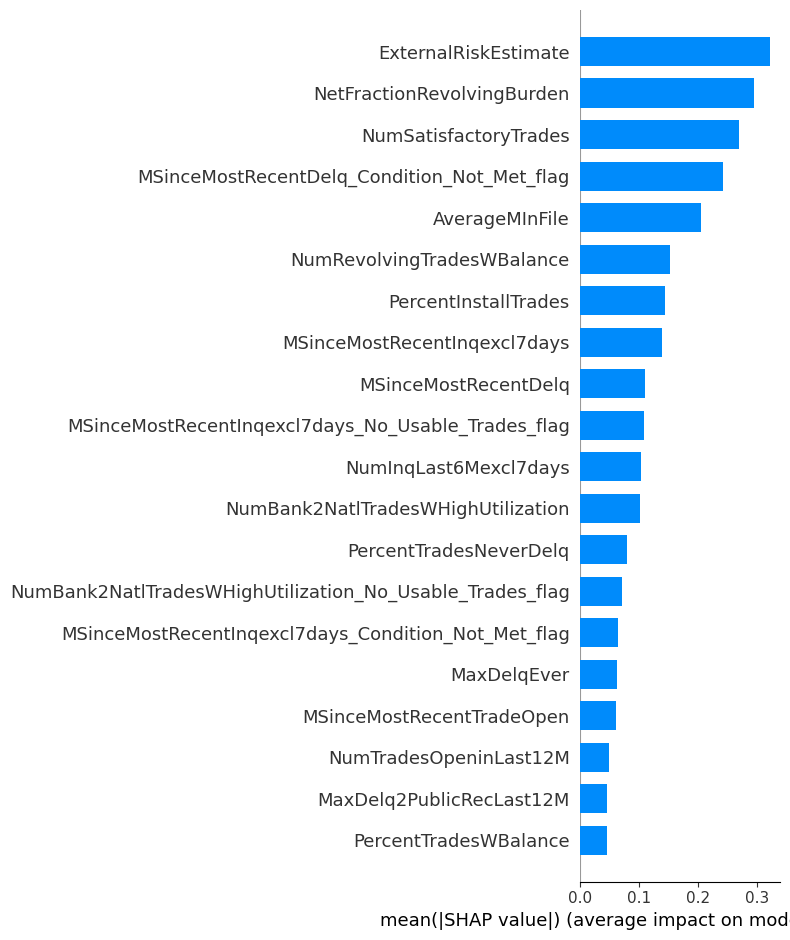

In [22]:
# 1. Scale the data (Logistic Regression needs this to match the model's training)
X_test_scaled = baseline_pipeline.named_steps['scaler'].transform(X_test)

# 2. Use LinearExplainer for Logistic Regression
explainer_log = shap.LinearExplainer(
    baseline_pipeline.named_steps['log_reg'], 
    X_test_scaled, 
    feature_names=X_test.columns.tolist()
)
shap_values_log = explainer_log.shap_values(X_test_scaled)

# 3. Plot Summary (Consistency: plot_type="bar")
# Note: Logistic SHAP values are 2D, so we don't need the [:, :, 1] slice 
# that the 3D Random Forest output required.
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_log, X_test_scaled, feature_names=X_test.columns.tolist(), plot_type="bar")